# Optim-ization

0:  |F(x)| = 40.1231; step 1
1:  |F(x)| = 16.8211; step 1
2:  |F(x)| = 5.68784; step 1
3:  |F(x)| = 1.41189; step 1
4:  |F(x)| = 0.0385047; step 1
5:  |F(x)| = 0.00172767; step 1
6:  |F(x)| = 0.000132032; step 1
7:  |F(x)| = 6.27763e-06; step 1
8:  |F(x)| = 4.21178e-07; step 1
Residual: 4.21178e-07


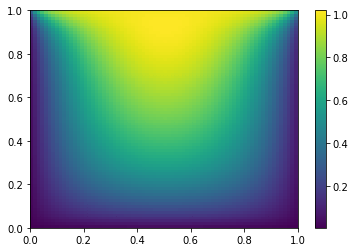

In [4]:
import numpy as np
from scipy.optimize import root
from numpy import cosh, zeros_like, mgrid, zeros

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
   d2x = zeros_like(P)
   d2y = zeros_like(P)

   d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
   d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
   d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

   d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
   d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
   d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

   return d2x + d2y + 5*cosh(P).mean()**2

# solve
guess = zeros((nx, ny), float)
sol = root(residual, guess, method='krylov', options={'disp': True})
#sol = root(residual, guess, method='broyden2', options={'disp': True, 'max_rank': 50})
#sol = root(residual, guess, method='anderson', options={'disp': True, 'M': 10})
print('Residual: %g' % abs(residual(sol.x)).max())

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolor(x, y, sol.x)
plt.colorbar()
plt.show()

scipy包里面的minimize函数求解

7.99999990708696
True
[-1.00000002  1.00000002]


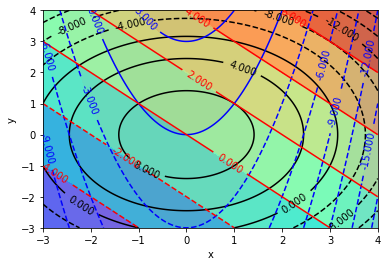

In [5]:
from scipy.optimize import minimize
import numpy as np 
 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt 
 
#目标函数：
def func(args):
    fun = lambda x: 10 - x[0]**2 - x[1]**2
    return fun
 
#约束条件，包括等式约束和不等式约束
def con(args):
    cons = ({'type': 'ineq', 'fun': lambda x: x[1]-x[0]**2},
            {'type': 'eq', 'fun': lambda x: x[0]+x[1]})
    return cons 
 
#画三维模式图
def draw3D():
    fig = plt.figure()
    ax = Axes3D(fig)
    x_arange = np.arange(-5.0, 5.0)
    y_arange = np.arange(-5.0, 5.0)
    X, Y = np.meshgrid(x_arange, y_arange)
    Z1 = 10 - X**2 - Y**2
    Z2 = Y - X**2
    Z3 = X + Y
    plt.xlabel('x')
    plt.ylabel('y')
    ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap='rainbow')
    ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap='rainbow')
    ax.plot_surface(X, Y, Z3, rstride=1, cstride=1, cmap='rainbow')
    plt.show()
 
#画等高线图
def drawContour():
    x_arange = np.linspace(-3.0, 4.0, 256)
    y_arange = np.linspace(-3.0, 4.0, 256)
    X, Y = np.meshgrid(x_arange, y_arange)
    Z1 = 10 - X**2 - Y**2
    Z2 = Y - X**2
    Z3 = X + Y
    plt.xlabel('x')
    plt.ylabel('y')
    plt.contourf(X, Y, Z1, 8, alpha=0.75, cmap='rainbow')
    plt.contourf(X, Y, Z2, 8, alpha=0.75, cmap='rainbow')
    plt.contourf(X, Y, Z3, 8, alpha=0.75, cmap='rainbow')
    C1 = plt.contour(X, Y, Z1, 8, colors='black')
    C2 = plt.contour(X, Y, Z2, 8, colors='blue')
    C3 = plt.contour(X, Y, Z3, 8, colors='red')
    plt.clabel(C1, inline=1, fontsize=10)
    plt.clabel(C2, inline=1, fontsize=10)
    plt.clabel(C3, inline=1, fontsize=10)
    plt.show()
 
 
if __name__ == "__main__":
    args = ()
    args1 = ()
    cons = con(args1)
    x0 = np.array((1.0, 2.0))  #设置初始值，初始值的设置很重要，很容易收敛到另外的极值点中，建议多试几个值
    
    #求解#
    res = minimize(func(args), x0, method='SLSQP', constraints=cons)
    #####
    print(res.fun)
    print(res.success)
    print(res.x)
 
    # draw3D()
    drawContour()
    